### Placement Assignment Machine Learning

#### Q-4. Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm

In [16]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("online_shoppers_intention.csv")
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [4]:
df = data.copy()

In [6]:
df.shape

(12330, 18)

In [8]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

<AxesSubplot:ylabel='VisitorType'>

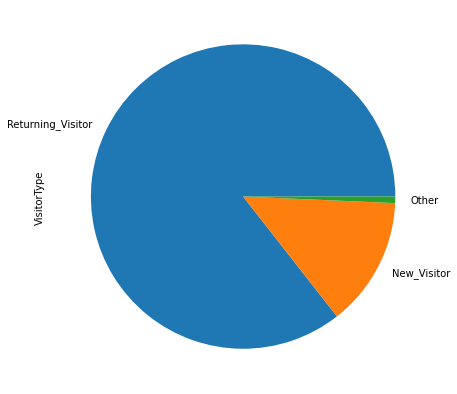

In [13]:
df['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))

In [11]:
df.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue')

Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


<AxesSubplot:xlabel='Weekend'>

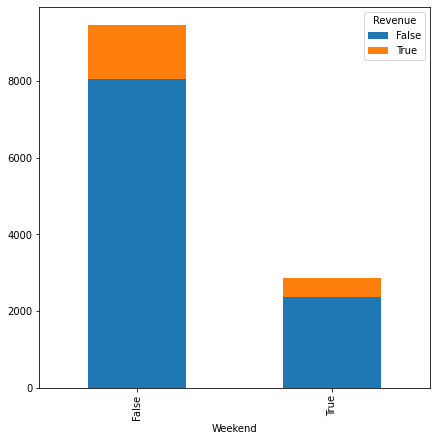

In [12]:
df.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

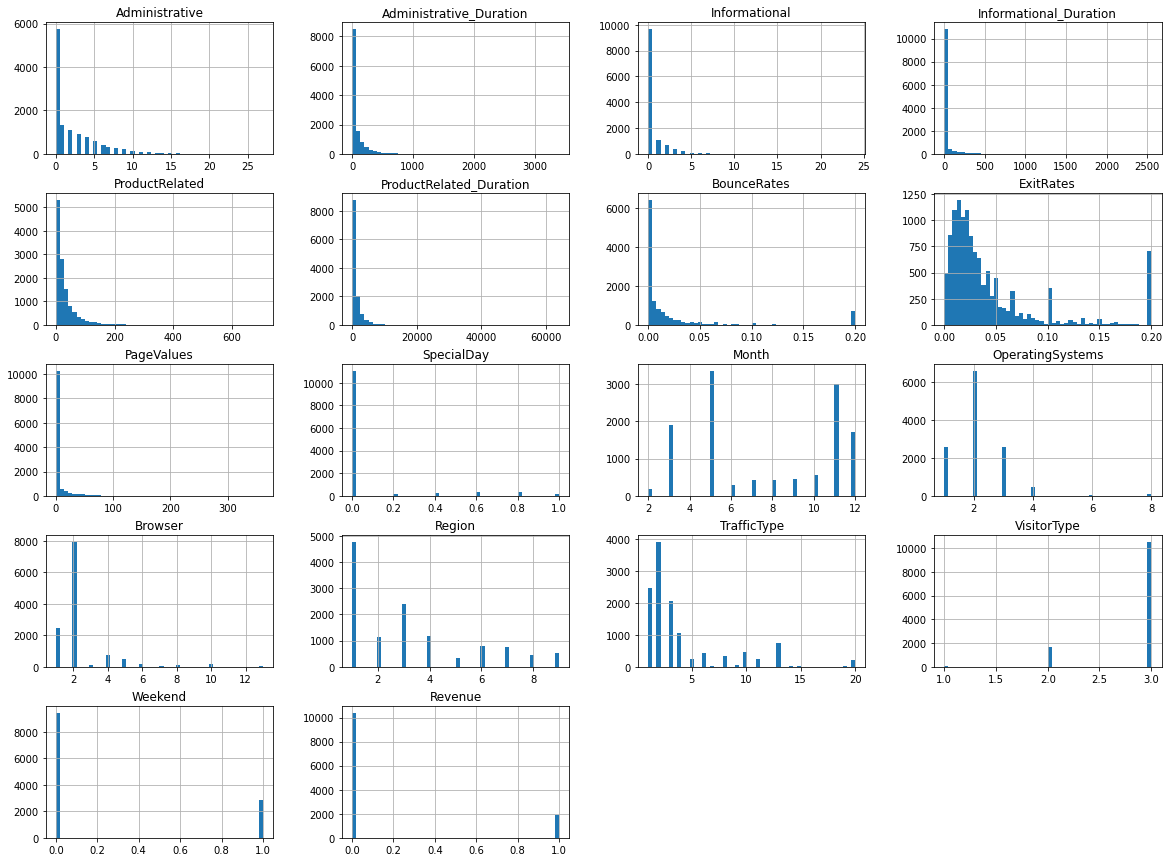

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

In [18]:
y = df[['Revenue']]
X = df.drop(["Revenue"], axis= 1)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9864, 17), (2466, 17), (9864, 1), (2466, 1))

In [23]:
def evaluate_model(true, predicted):
    accuracy_score1 = accuracy_score(true, predicted)
    return accuracy_score1

In [28]:
models={
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors = 17)
}

trained_model_list=[]
model_list=[]
accuracy_score_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)
    #print(y_pred.shape)
    #print(y_test.shape)
    accuracy_score1=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Accuracy score",accuracy_score1)
    print('='*35)
    print('\n')
    
    accuracy_score_list.append(accuracy_score1)
    
    print(confusion_matrix(y_test,y_pred))
    print('='*35)
    print('\n')
    
    print(classification_report(y_test, y_pred)) 
    
    print('='*35)
    print('\n')

KNeighborsClassifier
Accuracy score 0.8519870235198702


[[2036   19]
 [ 346   65]]


              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2055
           1       0.77      0.16      0.26       411

    accuracy                           0.85      2466
   macro avg       0.81      0.57      0.59      2466
weighted avg       0.84      0.85      0.81      2466





In [25]:
confusion_matrix,classification_report

ModuleNotFoundError: No module named 'scikitplot'